In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivo Excel
file_path = 'laminatesexports.xlsx'

# Lista de hojas (nombres de países)
sheet_names = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Cargar el archivo
xls = pd.ExcelFile(file_path)

### Descripción de los Datos

In [3]:
# Función para analizar una hoja
def analizar_hoja(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Mostrar dimensiones
    #print(f"{sheet}: {df.shape}")
    print(f"🔍 Dimensión del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # Análisis por columnas
    resumen = []
    #for col in df.columns:
    #     tipo_dato = df[col].dtype
    #     tipo = 'Numérico' if pd.api.types.is_numeric_dtype(df[col]) else 'Categórico'
    #     n_valores_unicos = df[col].nunique()
    #     valores_unicos = df[col].unique() if n_valores_unicos <= 10 else f"{n_valores_unicos} únicos"
    #     nulos = df[col].isnull().sum()

    #     resumen.append({
    #         "Nombre": col,
    #         "Tipo de dato": tipo_dato,
    #         "Tipo (Cat/Num)": tipo,
    #         "Valores únicos": valores_unicos,
    #         "Valores nulos": nulos
    #     })
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
       #'Valores únicos': df.nunique(),
        'Valores no nulos': df.count(),
        'Valores nulos': df.isnull().sum()
    })
    resumen['Tipo (Cat/Num)'] = resumen['Tipo de dato'].apply(
        lambda x: 'Numérico' if pd.api.types.is_numeric_dtype(x) else 'Categórico'
    )

    resumen_df = pd.DataFrame(resumen)
    print("\n📌 Resumen de variables:")
    print(resumen_df)
    print("\n" + "="*50)

In [4]:
# Ejecutar análisis por cada hoja
for sheet in sheet_names:
    analizar_hoja(sheet)


📄 Hoja: Argentina
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categórico
Mid_Value          float64               166              2       Numérico
Mid_Change         float64               166              2       Numérico


📄 Hoja: Brasil
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categórico
Mid_Value          float64               166              2       Numérico
Mid_Change         float64               166              2       Numérico


📄 Hoja: Chile
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168             

### Exploración de los Datos

In [5]:
# Función para realizar la exploración de datos
def exploracion_de_datos(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Dividir las columnas en cualitativas y cuantitativas
    cuantitativas = df.select_dtypes(include=['float64', 'int64'])
    temporales = df.select_dtypes(include=['datetime64[ns]'])

    # Análisis para variables cualitativas
    print("\n Distribución de frecuencias para variables cualitativas:")

    # Medidas estadísticas para variables cuantitativas
    print("\n Medidas estadísticas para variables cuantitativas:")

    if not temporales.empty:
        for col in temporales.columns:
            print(f"\nAnálisis de la variable: {col}")
            print(f"- Media temporal (fecha): {temporales[col].mean()}")
            print(f"- Rango de fechas: {temporales[col].min()} - {temporales[col].max()}")

    if not cuantitativas.empty:
        for col in cuantitativas.columns:
            print(f"\nAnálisis de la variable: {col}")

            # Descripción estadística con describe()
            desc = cuantitativas[col].describe()
            print(desc)

            # Cuartiles y Rango Intercuartílico (IQR)
            Q1 = desc['25%']
            Q3 = desc['75%']
            IQR = Q3 - Q1
            print(f"- Rango intercuartílico (IQR): {IQR}")

            # Outliers
            outliers = cuantitativas[(cuantitativas[col] < (Q1 - 1.5 * IQR)) | (cuantitativas[col] > (Q3 + 1.5 * IQR))]
            print(f"- Outliers detectados: {outliers.shape[0]}")

            #Series de tiempo
            plt.figure(figsize=(10, 4))
            plt.plot(df[temporales.columns[0]], df[col], marker='o')
            plt.title(f"Serie de tiempo de {col}")
            plt.xlabel("Fecha")
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(True)
            plt.show()

            # Boxplot
            print("\n")
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=cuantitativas[col])
            plt.title(f"Boxplot de {col}")
            plt.show()

            # Histograma para distribución de datos
            plt.figure(figsize=(6, 4))
            sns.histplot(cuantitativas[col], kde=True, bins=20)
            plt.title(f"Histograma de {col}")
            plt.show()

    # Análisis de correlación (Mapa de calor)
    print("\n Análisis de correlación de las variables cuantitativas:")
    if not cuantitativas.empty and cuantitativas.shape[1] > 1:
        corr_matrix = cuantitativas.corr()
        plt.figure(figsize=(4, 3))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Mapa de calor de la correlación entre variables cuantitativas")
        plt.show()

    print("\n" + "="*40)


📄 Hoja: Argentina

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean      60.059679
std       23.063959
min       12.340000
25%       43.802782
50%       59.069230
75%       75.794500
max      117.872000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 31.991718454583335
- Outliers detectados: 0


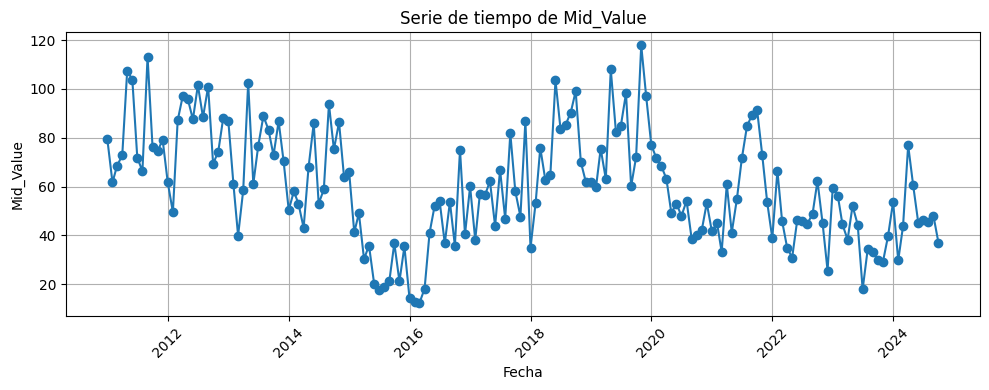

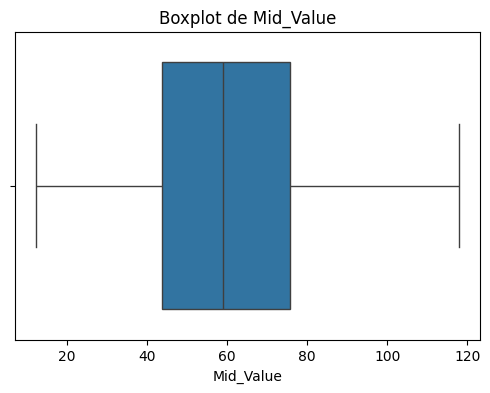

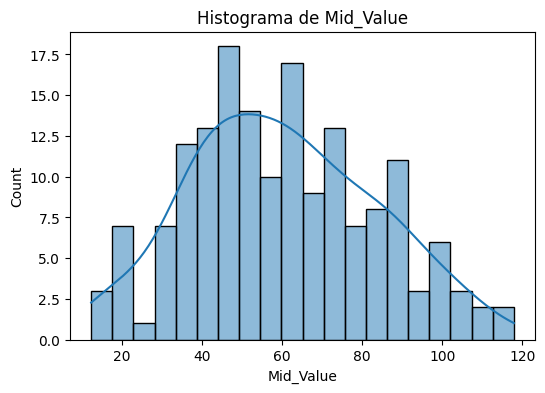


Análisis de la variable: Mid_Change
count    166.000000
mean       5.420027
std       36.777544
min      -59.939657
25%      -21.681377
50%       -1.021167
75%       19.650889
max      131.403830
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 41.332266906285795
- Outliers detectados: 6


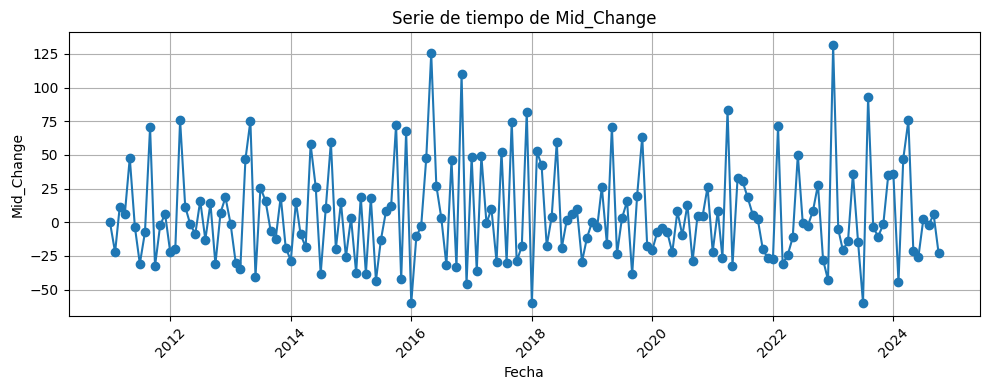

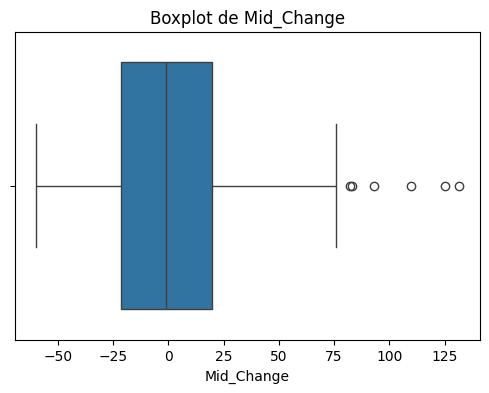

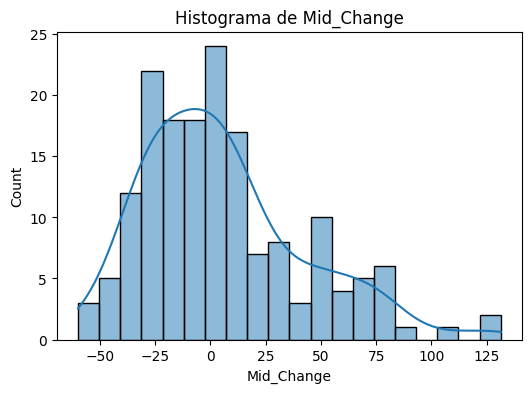


 Análisis de correlación de las variables cuantitativas:


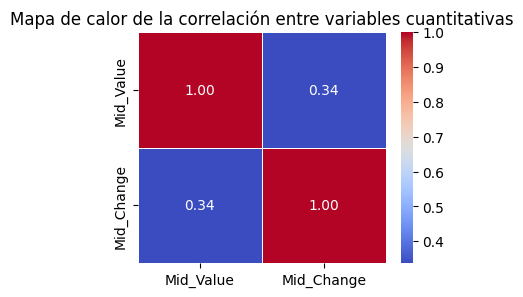



📄 Hoja: Brasil

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean     297.159295
std      109.728815
min      121.684000
25%      203.924750
50%      283.562500
75%      382.108000
max      574.445000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 178.18324999999993
- Outliers detectados: 0


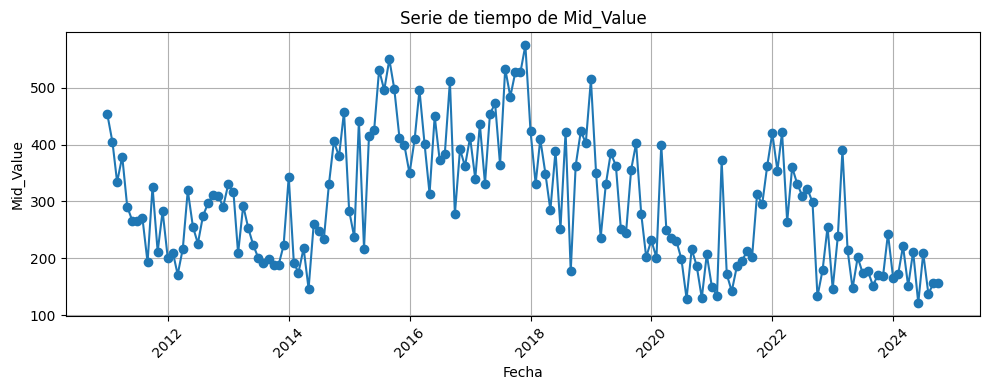

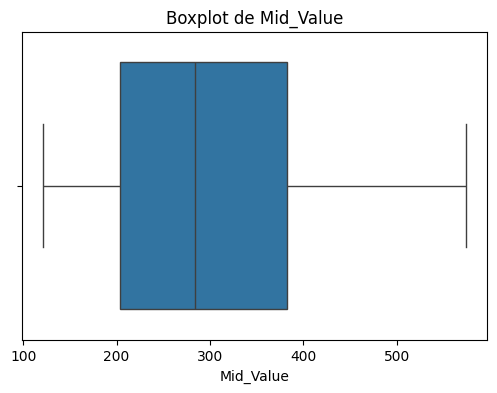

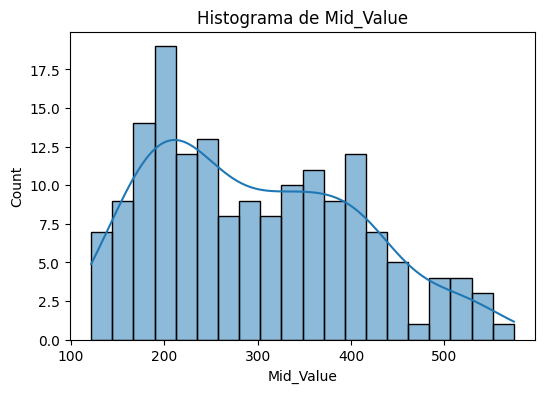


Análisis de la variable: Mid_Change
count    166.000000
mean       4.613145
std       34.887059
min      -58.068219
25%      -17.299975
50%       -2.768398
75%       22.719731
max      176.166426
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 40.01970634981089
- Outliers detectados: 5


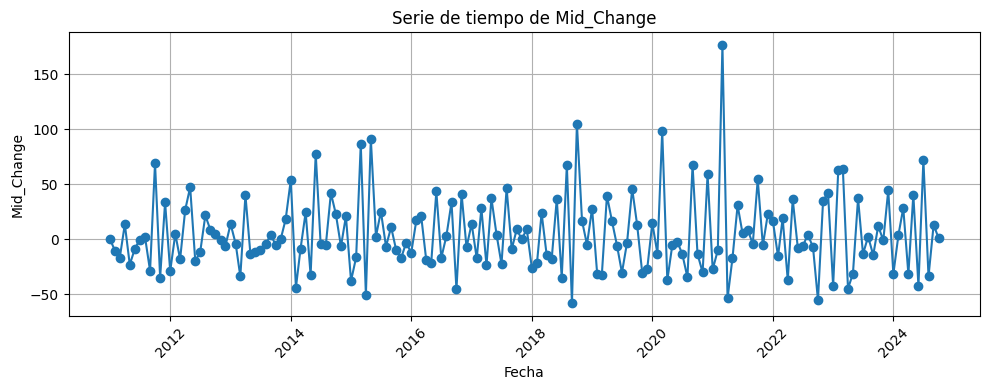

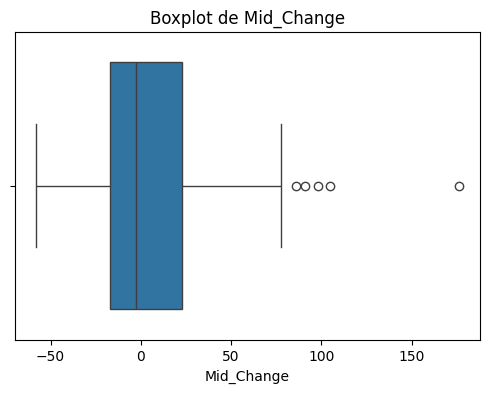

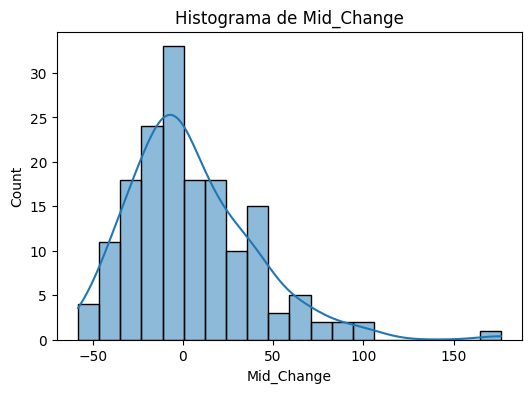


 Análisis de correlación de las variables cuantitativas:


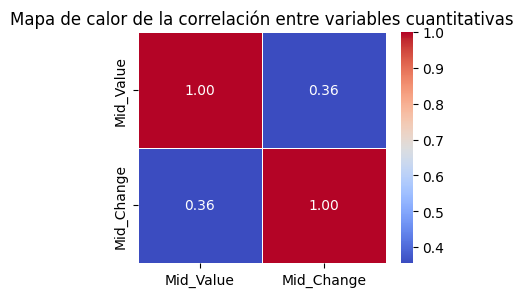



📄 Hoja: Chile

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean      14.795772
std       12.309220
min        0.380587
25%        4.335375
50%       11.387154
75%       23.191784
max       54.146856
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 18.856408817499997
- Outliers detectados: 2


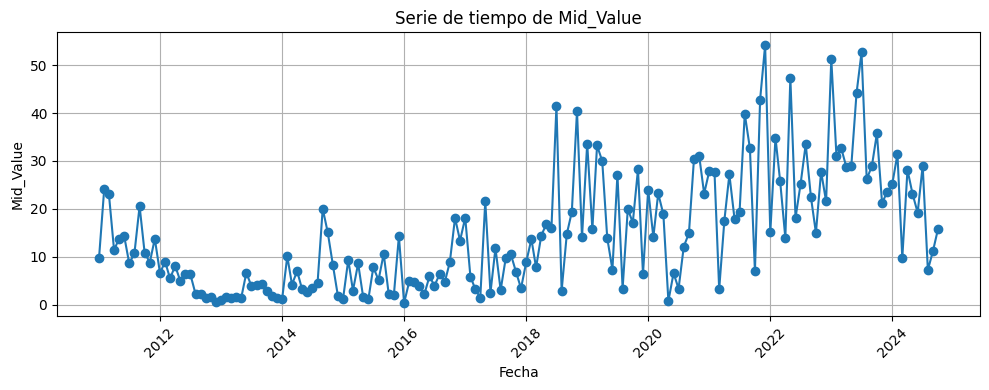

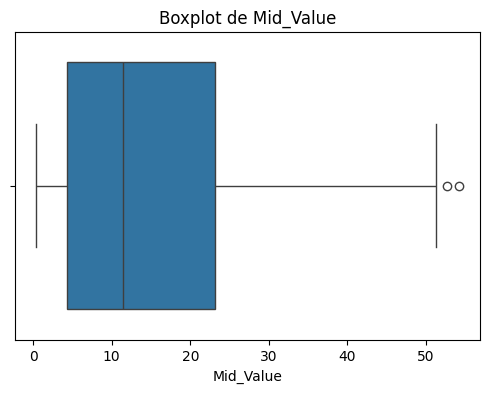

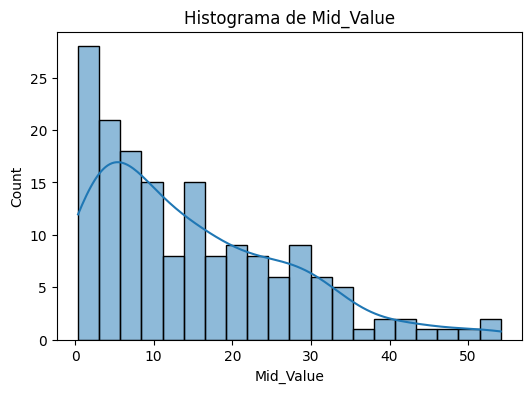


Análisis de la variable: Mid_Change
count     166.000000
mean       62.606965
std       208.246221
min       -97.337428
25%       -40.264427
50%         0.541315
75%        63.292672
max      1425.196153
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 103.55709940033947
- Outliers detectados: 19


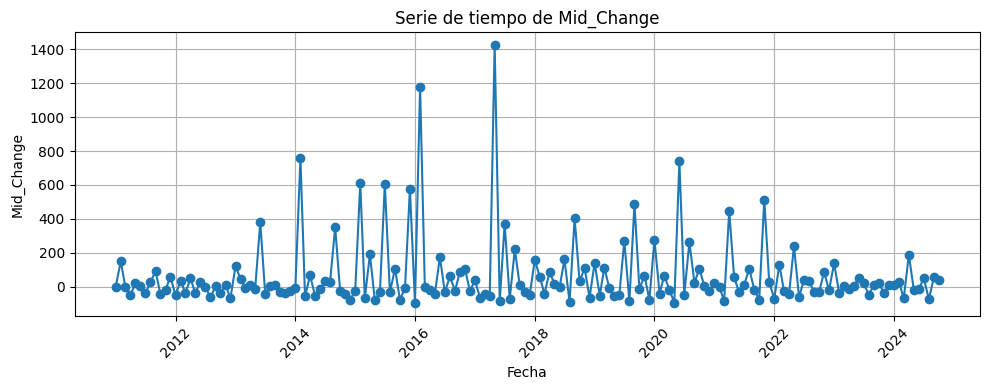

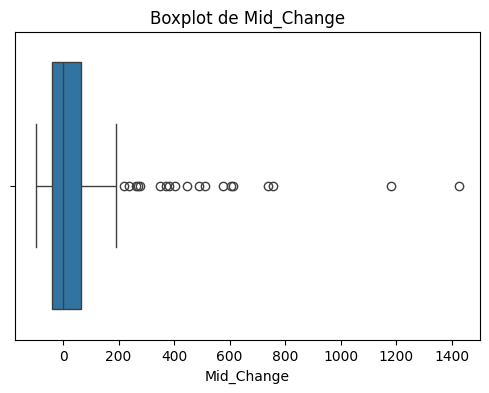

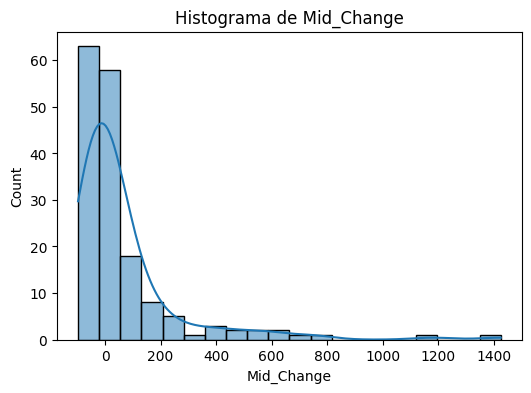


 Análisis de correlación de las variables cuantitativas:


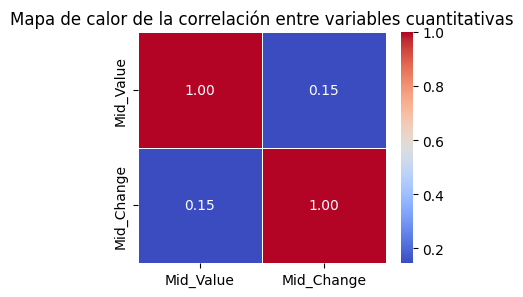



📄 Hoja: Colombia

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean       6.296973
std        4.330407
min        0.774343
25%        3.889857
50%        5.882278
75%        7.645501
max       43.074262
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 3.7556443374999997
- Outliers detectados: 8


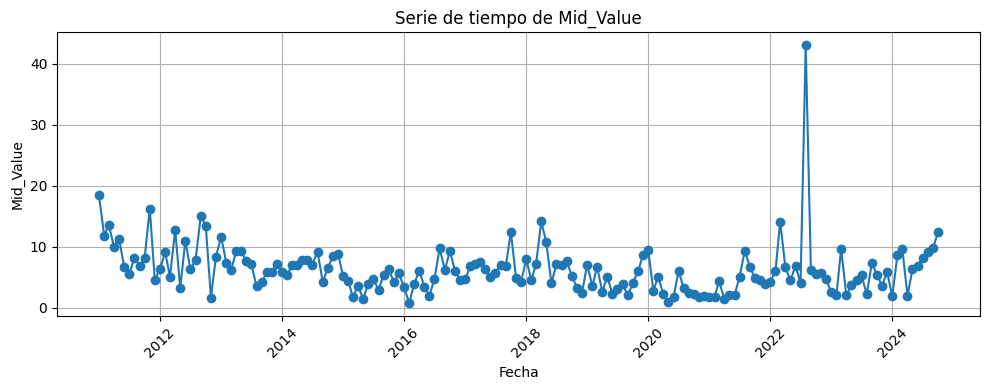

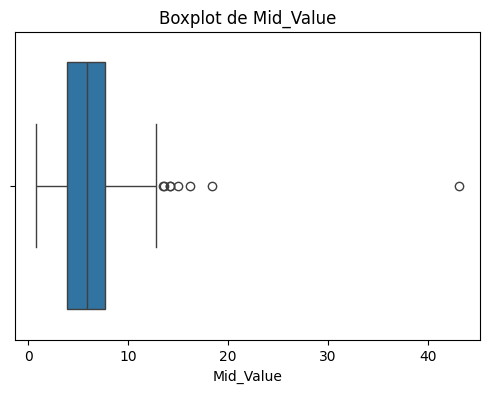

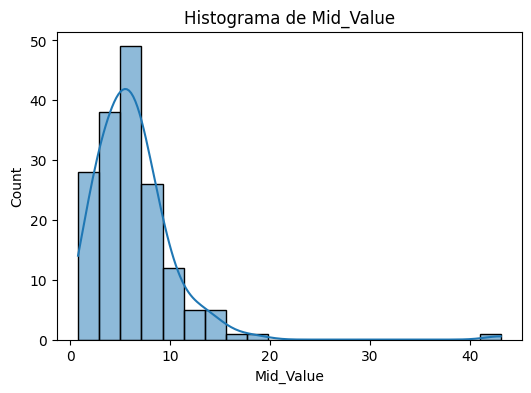


Análisis de la variable: Mid_Change
count    166.000000
mean      26.966039
std      113.380443
min      -87.764543
25%      -33.179738
50%        4.009068
75%       47.366971
max      968.337905
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 80.54670933847837
- Outliers detectados: 11


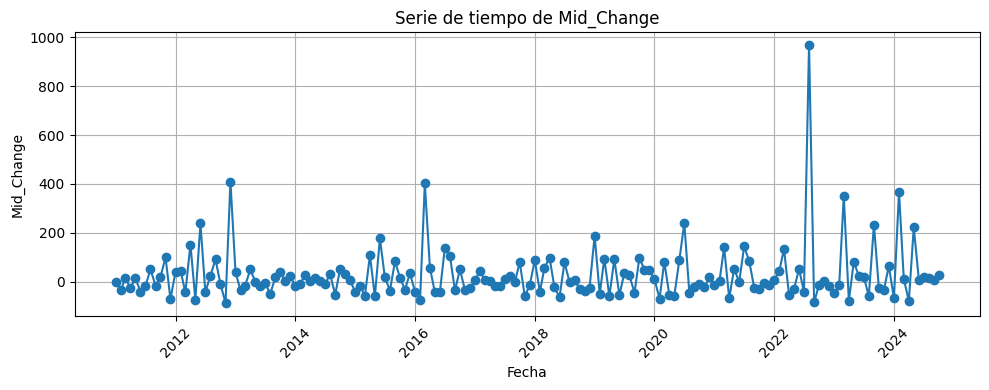

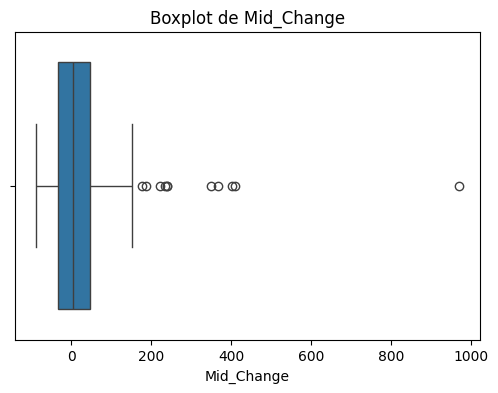

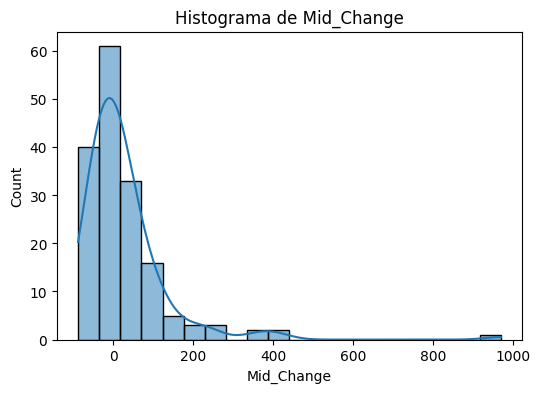


 Análisis de correlación de las variables cuantitativas:


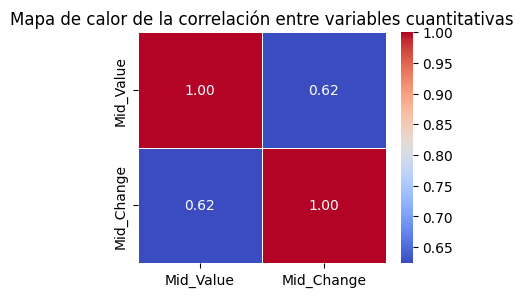



📄 Hoja: Mexico

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean     306.120687
std       59.631428
min      195.522712
25%      267.895315
50%      289.936930
75%      341.467989
max      543.003494
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 73.57267419280998
- Outliers detectados: 6


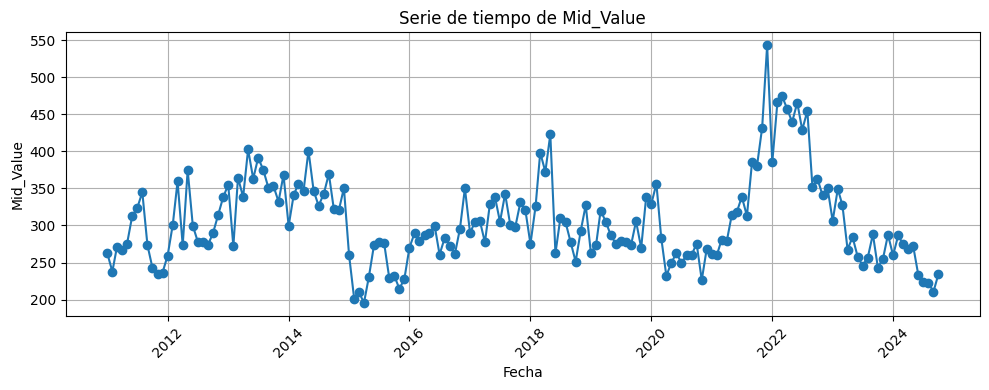

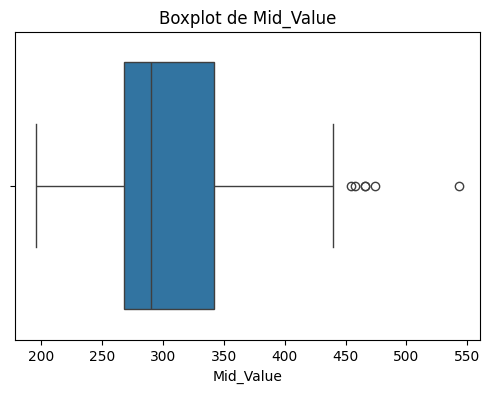

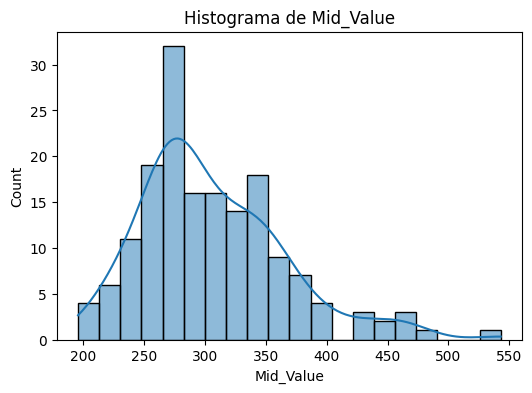


Análisis de la variable: Mid_Change
count    166.000000
mean       0.725833
std       12.514230
min      -37.929667
25%       -6.510471
50%        0.539271
75%        8.460442
max       37.113935
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 14.970913192843899
- Outliers detectados: 4


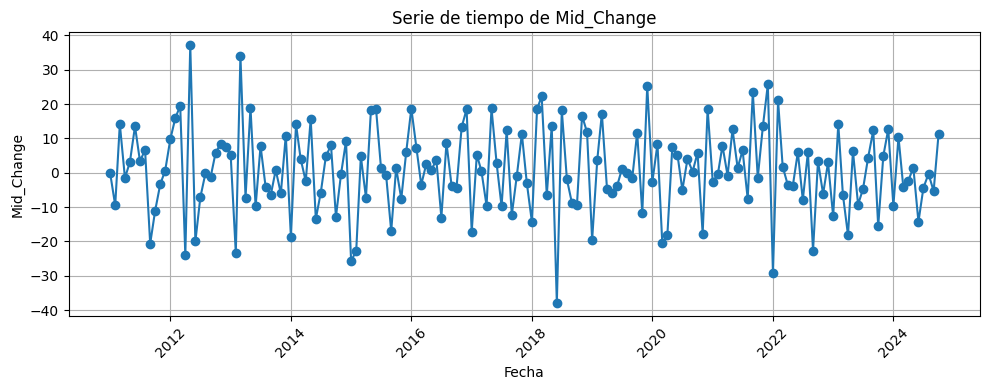

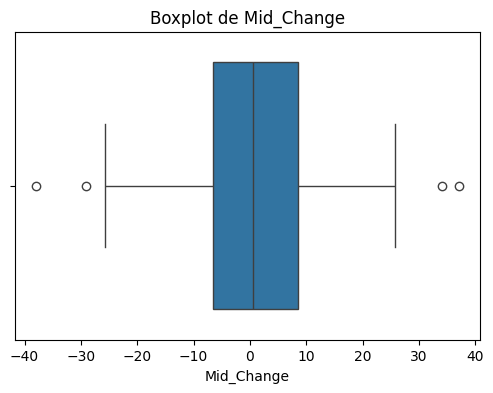

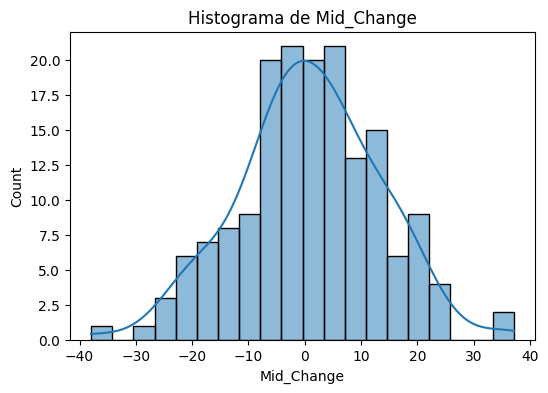


 Análisis de correlación de las variables cuantitativas:


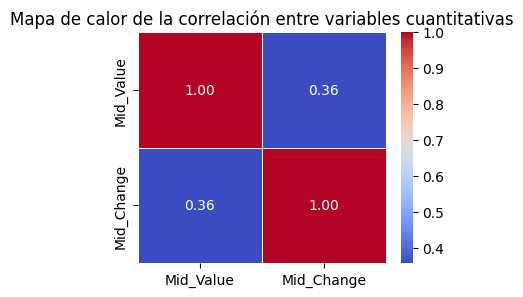



📄 Hoja: Peru

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    166.000000
mean      15.534547
std        7.310406
min        2.427671
25%       10.702866
50%       14.405140
75%       17.937824
max       50.854224
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 7.234957612500004
- Outliers detectados: 10


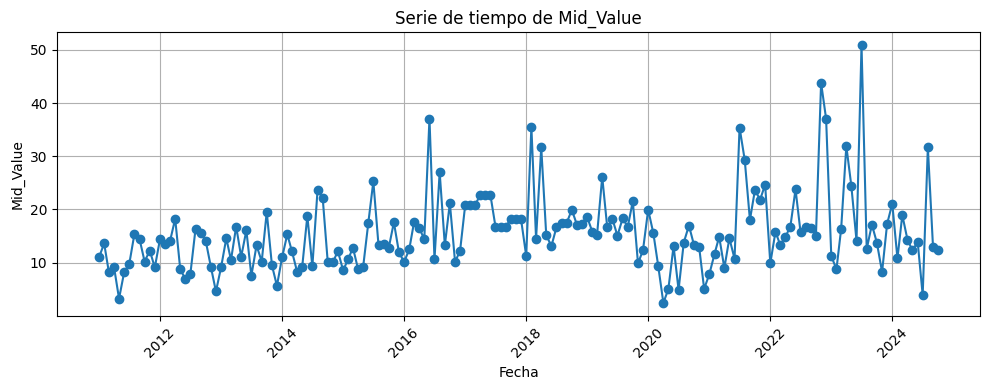

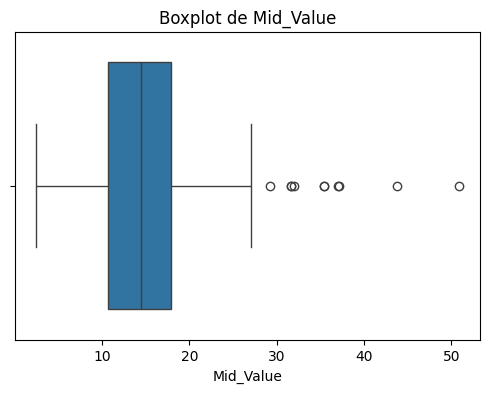

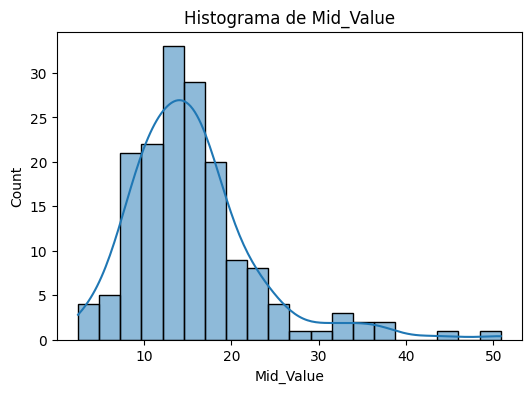


Análisis de la variable: Mid_Change
count    166.000000
mean      17.487880
std       81.994011
min      -75.275966
25%      -26.327528
50%        0.000000
75%       37.421690
max      705.489025
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 63.749217626431815
- Outliers detectados: 11


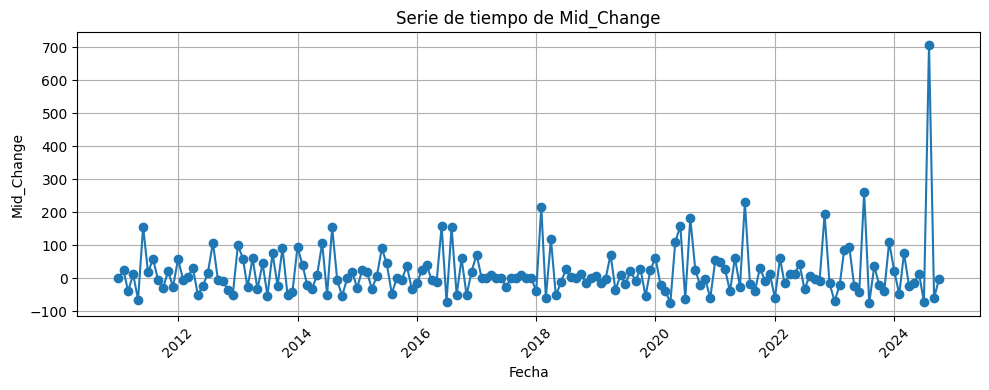

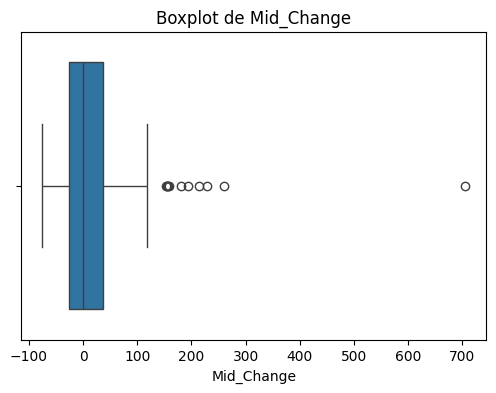

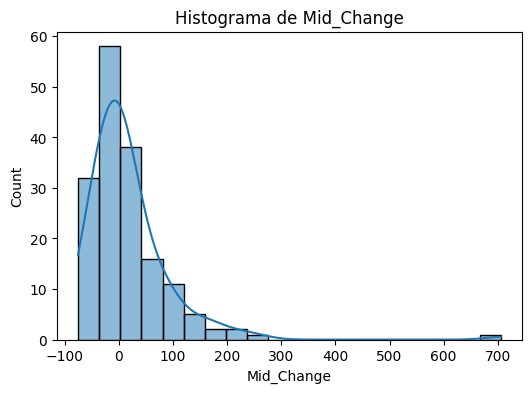


 Análisis de correlación de las variables cuantitativas:


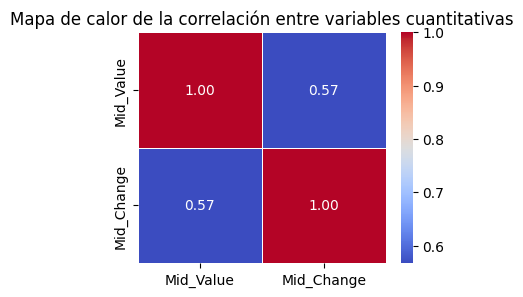

In [6]:
# Ejecutar el análisis para cada hoja
for sheet in sheet_names:
    exploracion_de_datos(sheet)